In [5]:
import os
import sys

import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import pandas as pd
sns.set(style='whitegrid', rc={
    'figure.figsize':(12,8),
    'legend.fontsize': 'large',
    'legend.title_fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Lucida Grande'
})

from simulated_utils import compare
from simulated_utils import SinglePeakCtsBanditEnv

In [16]:
 def plot_results(data, n_boot=1000):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4.5))
    fig.subplots_adjust(left=-0.2)
    sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', ax=axes[0], n_boot=n_boot)
    axes[0].set_ylabel('Mean Reward')
    sns.lineplot(data=data, x='iter', y='pd_param_0_mean', hue='method', ax=axes[1], n_boot=n_boot)
    axes[1].set_ylabel('Gaussian Policy Mean')
    axes[1].set_ylim([-3,3])
    sns.lineplot(data=data, x='iter', y='pd_param_1_mean', hue='method', ax=axes[2], n_boot=n_boot)
    axes[2].set_ylabel('Gaussian Policy Standard Deviation')
    axes[2].set_ylim([0,1])

    handles, labels = axes.flatten()[0].get_legend_handles_labels()
    for ax in axes.flatten():
        ax.get_legend().remove()
        ax.set_xlabel('# Iterations')
    fig.legend(handles[1:], labels[1:], loc='upper center', title='Method', ncol=4)
    plt.show()

In [3]:
def filter_df(df, **kwargs):
    for k,v in kwargs.items():
        df = df[df[k] == v]
    return df

In [6]:
env = SinglePeakCtsBanditEnv(noise_std=0.001)
data = compare(env, 'gaussian', n_steps=50, repeats=10,
               lr=1e-1, batch_size=16*32, num_minibatches=16, ppo_epochs=10)

plot_results(data)

/home/eecs/chloehsu/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [7]:
%matplotlib inline

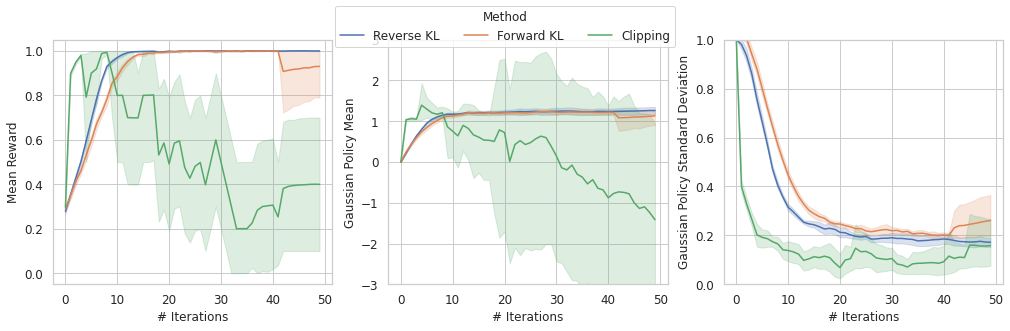

In [19]:
plot_results(data[data.method != 'Unregularized'], n_boot=1000)